<a href="https://colab.research.google.com/github/VictorCalebeIFG/MachineLearning_Python/blob/main/Arvores_de_Decisao_Risco_de_Credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Árvores de Decisão - Risco de Crédito** 



**Vantagens:**


*   Fácil interpretação
*   Não precisa de Padronização ou Normalização dos dados


**Desvantagens**

*   Geração de arvores muitos complexas podem causar "Overfiting"
*   Pequenas mudanças nos dados podem gerar mais "galhos".





In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
import pickle

with open("/content/risco_credito.pkl","rb") as f:
    x_risco_cred,y_risco_cred = pickle.load(f)

### "Encaixando" valores na arvore:

In [25]:
arvore = DecisionTreeClassifier(criterion="entropy");
arvore.fit(x_risco_cred,y_risco_cred);

### Mostrando atributos mais importantes:


Como pode ser visto na Tabela abaixo, o primeiro atributo é a historia, o segundo é a divida, o terceiro é a garantia e o ultimo é a renda.

In [26]:
import pandas as pd

risco_cred = pd.read_csv("/content/risco_credito.csv")
risco_cred.head(2)

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto


De acordo com o a célula abaixo, o atributo de maior importância é a renda, com 0.48 de importância.

In [27]:
arvore.feature_importances_

array([0.48015651, 0.03885431, 0.03885431, 0.44213486])

### Mostrando a arvore de decisão:

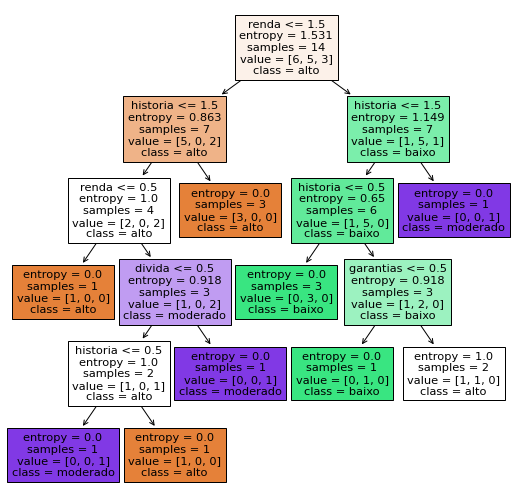

In [29]:
from sklearn import tree
import matplotlib.pyplot as plt

previsores = ["historia","divida", "garantias","renda"]

plt.figure(figsize=(9,9))                             # Tamanho da imagem
tree.plot_tree(arvore,feature_names = previsores,     # Plota a arvore o ";" retira o testo que fica acima do "output"
               class_names = arvore.classes_,
               filled = True);

### Testando Previsões

Abaixo, pode-se ver que o a previsão foi a mesma do Método de Bayes para o mesmo "Data Set".

In [32]:
# historia - Boa(0), divida - Alta(0), garatias - Nenhuma(1), renda - maior_que_35(2)

previsoes = arvore.predict([[0,0,1,2]])
previsoes

array(['baixo'], dtype=object)